In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection import iterative_train_test_split
from skmultilearn.cluster import MatrixLabelSpaceClusterer
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.ensemble import MajorityVotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df = pd.read_excel("Online_Retail.xlsx")
df2=df


In [3]:
df=df2

In [4]:
len(df)

541909

In [5]:
df['TotalPurchase'] = df['Quantity'] * df['UnitPrice']

In [6]:
df = df.dropna()


In [7]:
# Calculate the total number of transactions for each customer
customer_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
customer_transactions.columns = ['CustomerID', 'TotalTransactions']
transact_dict={}
for x,y in customer_transactions.values:
    transact_dict[x]=y
transact_dict


{12346.0: 2.0,
 12347.0: 7.0,
 12348.0: 4.0,
 12349.0: 1.0,
 12350.0: 1.0,
 12352.0: 11.0,
 12353.0: 1.0,
 12354.0: 1.0,
 12355.0: 1.0,
 12356.0: 3.0,
 12357.0: 1.0,
 12358.0: 2.0,
 12359.0: 6.0,
 12360.0: 3.0,
 12361.0: 1.0,
 12362.0: 13.0,
 12363.0: 2.0,
 12364.0: 4.0,
 12365.0: 3.0,
 12367.0: 1.0,
 12370.0: 4.0,
 12371.0: 2.0,
 12372.0: 3.0,
 12373.0: 1.0,
 12374.0: 1.0,
 12375.0: 3.0,
 12377.0: 2.0,
 12378.0: 1.0,
 12379.0: 3.0,
 12380.0: 5.0,
 12381.0: 6.0,
 12383.0: 6.0,
 12384.0: 3.0,
 12386.0: 2.0,
 12388.0: 6.0,
 12390.0: 1.0,
 12391.0: 1.0,
 12393.0: 4.0,
 12394.0: 2.0,
 12395.0: 15.0,
 12397.0: 2.0,
 12398.0: 1.0,
 12399.0: 4.0,
 12401.0: 1.0,
 12402.0: 1.0,
 12403.0: 2.0,
 12405.0: 1.0,
 12406.0: 3.0,
 12407.0: 5.0,
 12408.0: 9.0,
 12409.0: 7.0,
 12410.0: 3.0,
 12412.0: 3.0,
 12413.0: 5.0,
 12414.0: 3.0,
 12415.0: 26.0,
 12417.0: 12.0,
 12418.0: 1.0,
 12420.0: 1.0,
 12421.0: 5.0,
 12422.0: 3.0,
 12423.0: 9.0,
 12424.0: 2.0,
 12425.0: 1.0,
 12426.0: 1.0,
 12427.0: 5.0,
 1242

In [8]:
cust_list=df["CustomerID"].to_list()

In [9]:
total_trans=[transact_dict[x] for x in cust_list]
len(total_trans)

406829

In [10]:
df["TotalTransactions"]=total_trans

C:\Users\aswat\AppData\Local\Temp\ipykernel_25668\1734778238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["TotalTransactions"]=total_trans


In [11]:
from statistics import median
threshold=median(list(transact_dict.values()))
threshold

3.0

In [12]:
df['AB_Group'] = np.where(df['TotalTransactions'] > threshold, 'Frequent', 'Occasional')


C:\Users\aswat\AppData\Local\Temp\ipykernel_25668\2461033547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AB_Group'] = np.where(df['TotalTransactions'] > threshold, 'Frequent', 'Occasional')


In [13]:
df[df["AB_Group"]=="Frequent"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase,TotalTransactions,AB_Group
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,35.0,Frequent
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,35.0,Frequent
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,35.0,Frequent
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,35.0,Frequent
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,35.0,Frequent
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,4.0,Frequent
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,4.0,Frequent
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4.0,Frequent
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,4.0,Frequent


In [14]:
from scipy.stats import ttest_ind

group_a = df[df['AB_Group'] == 'Frequent']['TotalPurchase']
group_b = df[df['AB_Group'] == 'Occasional']['TotalPurchase']

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(group_a, group_b)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Check significance at 95% confidence level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between Frequent Shoppers and Occasional Shoppers.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between Frequent Shoppers and Occasional Shoppers.")


T-statistic: 4.438103851894787
P-value: 9.077862776153504e-06
Reject the null hypothesis: There is a significant difference between Frequent Shoppers and Occasional Shoppers.


c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


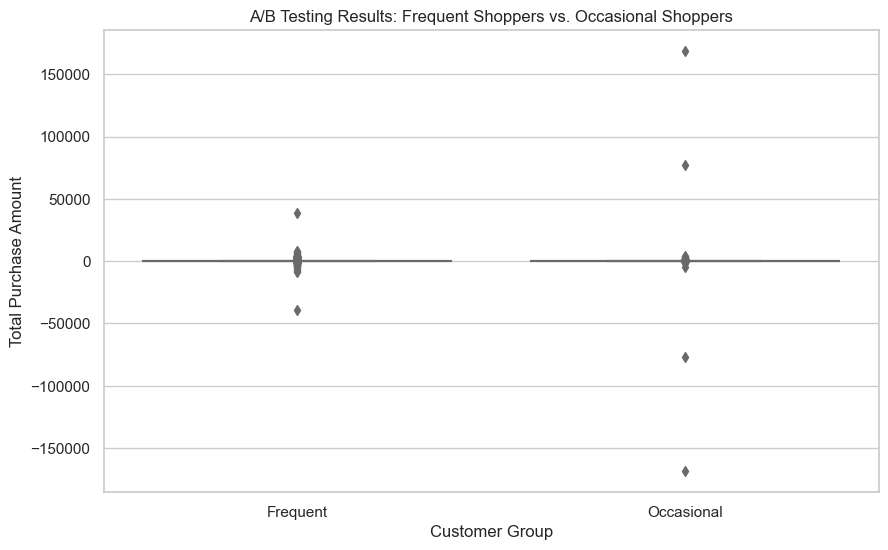

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style for better visualization
sns.set(style="whitegrid")

# Box plot for visualizing the distribution of total purchase amount in each group
plt.figure(figsize=(10, 6))
sns.boxplot(x='AB_Group', y='TotalPurchase', data=df, palette='Set3')
plt.title('A/B Testing Results: Frequent Shoppers vs. Occasional Shoppers')
plt.xlabel('Customer Group')
plt.ylabel('Total Purchase Amount')
plt.show()


In [56]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import LabelEncoder


df3 = df[['CustomerID', 'StockCode']]

# Convert customer and stock codes to numeric values
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()
df3['CustomerID'] = user_encoder.fit_transform(df3['CustomerID'])
df3['StockCode'] = item_encoder.fit_transform(df3['StockCode'].astype(str))

# Create a user-item interaction matrix
user_item_matrix = df3.pivot_table(index='CustomerID', columns='StockCode', aggfunc='size', fill_value=0)
user_item_matrix_array = user_item_matrix.values

# Nearest Neighbors Collaborative Filtering
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_item_matrix)

# Select a random user ID
random_user_id = np.random.choice(df3['CustomerID'].unique())
# Get personalized recommendations for the randomly selected user
random_user_vector = user_item_matrix.loc[random_user_id].values.reshape(1, -1)
distances, indices = knn_model.kneighbors(random_user_vector, n_neighbors=10)
# Convert item IDs back to original values
rec_list=user_item_matrix_array[indices.flatten()]
recommended_items=[]
for x in rec_list:
    recommended_items.append(item_encoder.inverse_transform(x)) 
from collections import Counter

recommended_items = [item for sublist in recommended_items for item in sublist]

# Step 2: Count the frequency of each element
element_counts = Counter(recommended_items)

# Step 3: Sort the list based on frequency
recommended_items = sorted(recommended_items, key=lambda x: element_counts[x], reverse=True)

print(f'Top 5 Recommendations for Randomly Selected Customer {random_user_id}: ')
for items in list(set(recommended_items))[:5]:
    print(items, end=" ")

C:\Users\aswat\AppData\Local\Temp\ipykernel_25668\2865819370.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['CustomerID'] = user_encoder.fit_transform(df3['CustomerID'])
C:\Users\aswat\AppData\Local\Temp\ipykernel_25668\2865819370.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['StockCode'] = item_encoder.fit_transform(df3['StockCode'].astype(str))


Top 5 Recommendations for Randomly Selected Customer 3144: 
15030 10002 10125 10124A 15044A 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder



df3 = df[['CustomerID', 'InvoiceDate']]

# Convert customer IDs to numeric values
user_encoder = LabelEncoder()
df3['CustomerID'] = user_encoder.fit_transform(df3['CustomerID'])

# Create a binary column indicating whether a customer churned (1) or not (0)
churn_threshold_days = 90  # Define the threshold for considering a customer as churned (e.g., 90 days without a purchase)
current_date = df3['InvoiceDate'].max()

# Identify customers who made a purchase within the last churn_threshold_days
active_customers = df3[df3['InvoiceDate'] >= current_date - pd.to_timedelta(churn_threshold_days, unit='D')]

# Create a list of churned customer IDs
churned_customer_ids = set(df3['CustomerID'].unique()) - set(active_customers['CustomerID'].unique())

# Create a binary column indicating churn
df3['Churn'] = np.where(df3['CustomerID'].isin(churned_customer_ids), 1, 0)
df["Churn"]=df3["Churn"].tolist()
# Feature engineering: Calculate recency, frequency, and monetary value for each customer
recency = df3.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (current_date - recency['InvoiceDate']).dt.days
recency = recency[['CustomerID', 'Recency']]

frequency = df3.groupby('CustomerID')['InvoiceDate'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

monetary_value = df3.groupby('CustomerID')['InvoiceDate'].count().reset_index()
monetary_value.columns = ['CustomerID', 'MonetaryValue']

# Merge features into a single DataFrame
features = recency.merge(frequency, on='CustomerID').merge(monetary_value, on='CustomerID')

# Train/test split for machine learning
X = features[['Recency', 'Frequency', 'MonetaryValue']]
y = df3.groupby('CustomerID')['Churn'].max().reset_index()['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


C:\Users\aswat\AppData\Local\Temp\ipykernel_16800\4237514981.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aswat\AppData\Local\Temp\ipykernel_16800\4237514981.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aswat\AppData\Local\Temp\ipykernel_16800\4237514981.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       281

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875

Accuracy: 100.00%


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPurchase,TotalTransactions,AB_Group,Churn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,4048,United Kingdom,15.30,35.0,Frequent,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,4048,United Kingdom,20.34,35.0,Frequent,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,4048,United Kingdom,22.00,35.0,Frequent,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,4048,United Kingdom,20.34,35.0,Frequent,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,4048,United Kingdom,20.34,35.0,Frequent,1
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,275,France,10.20,4.0,Frequent,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,275,France,12.60,4.0,Frequent,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,275,France,16.60,4.0,Frequent,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,275,France,16.60,4.0,Frequent,0


C:\Users\aswat\AppData\Local\Temp\ipykernel_16800\187820255.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\aswat\AppData\Local\Temp\ipykernel_16800\187820255.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



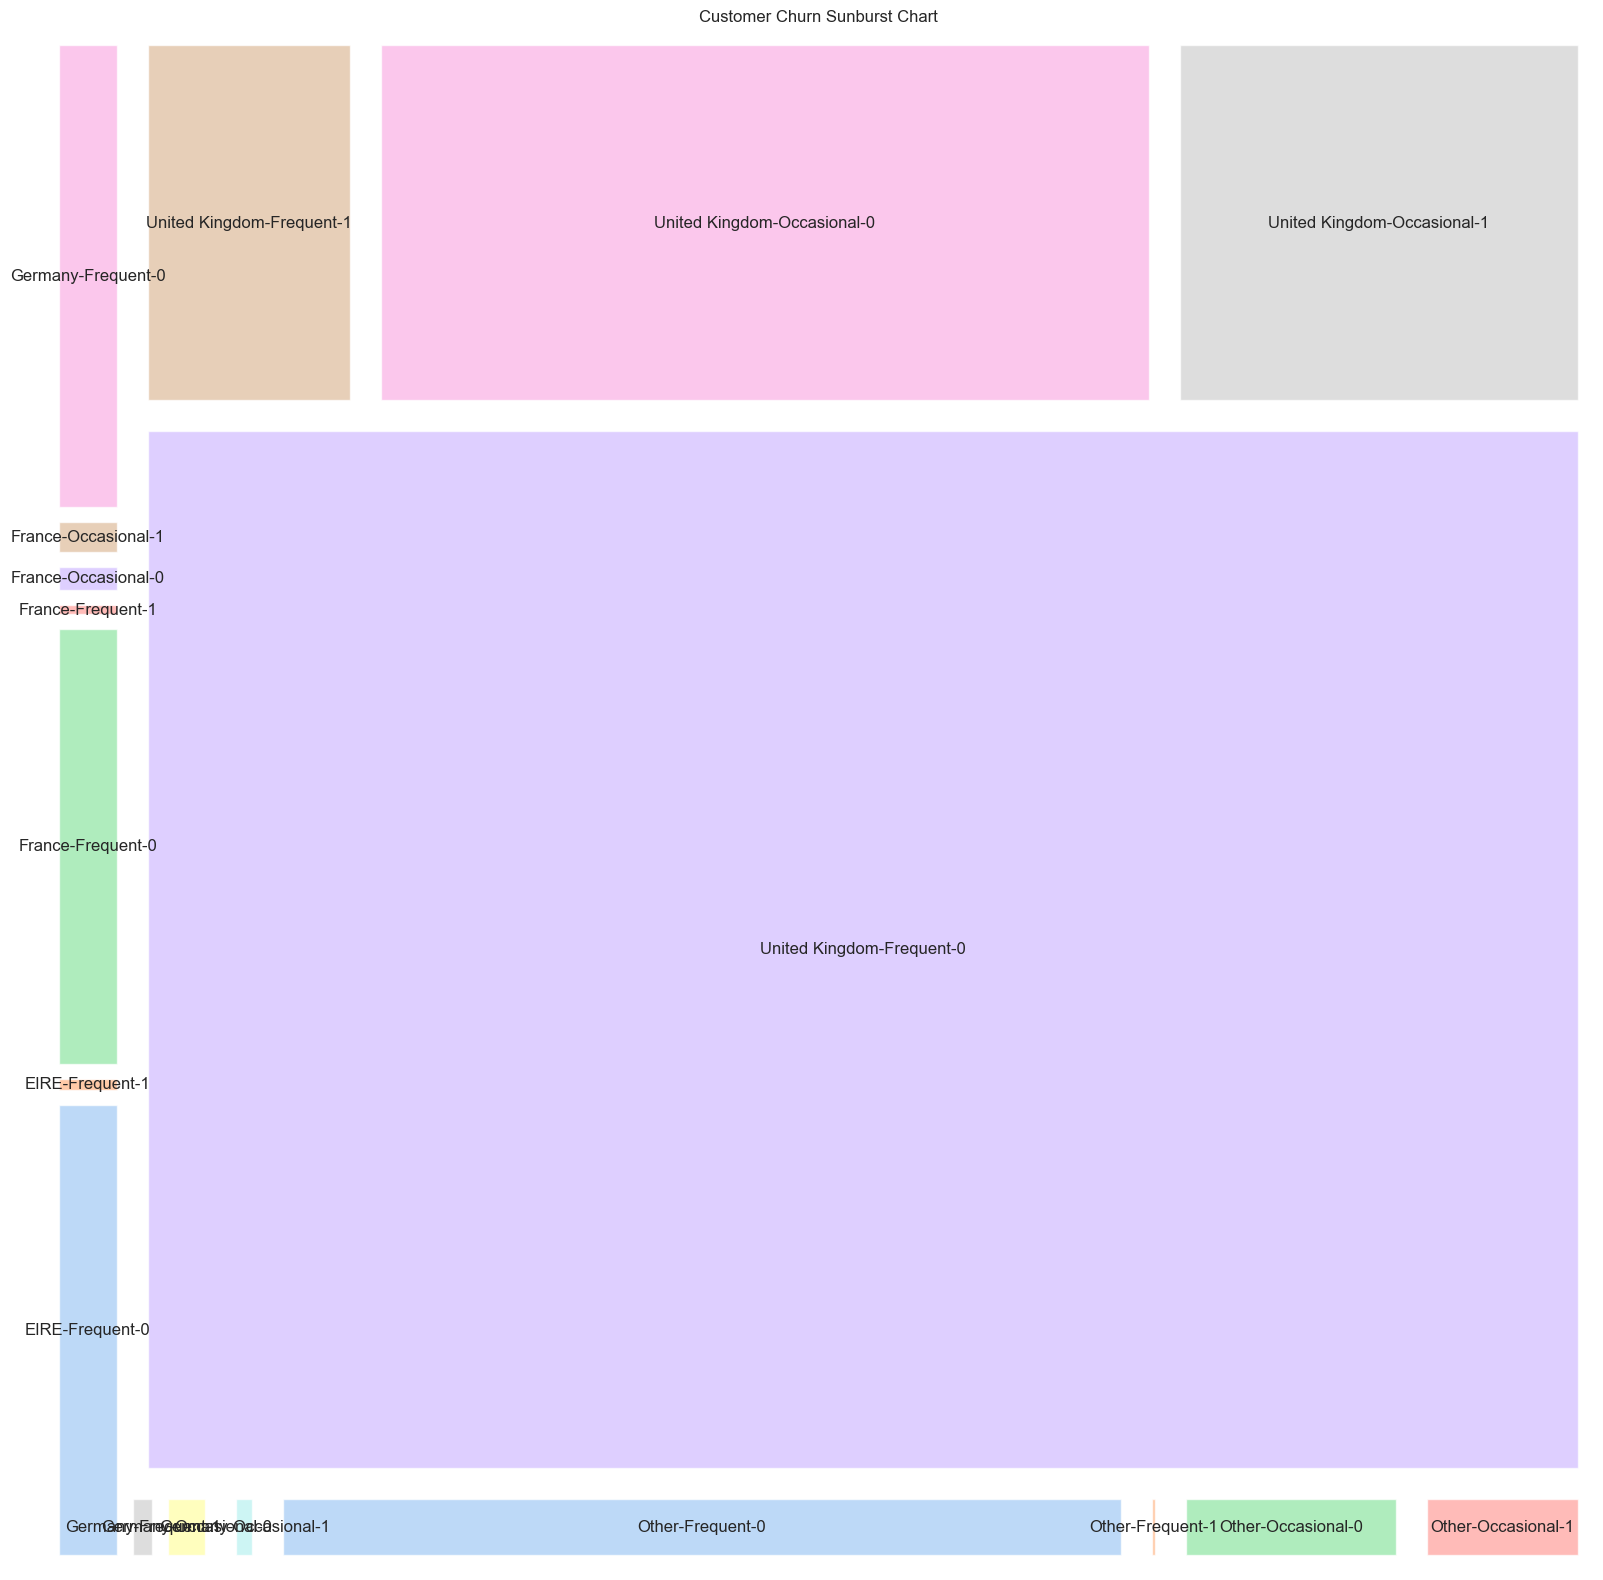

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

# Assuming 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Select the top N countries based on the count
top_countries = df['Country'].value_counts().nlargest(4).index
df['CountryGrouped'] = df['Country'].where(df['Country'].isin(top_countries), 'Other')

# Create a dataframe with the counts for each combination of CountryGrouped, AB_Group, and Churn
counts_df = df.groupby(['CountryGrouped', 'AB_Group', 'Churn']).size().reset_index(name='Count')

# Create a color palette using Seaborn
sns.set_palette("pastel")  # You can choose any Seaborn palette
colors = sns.color_palette()

# Plot Sunburst using squarify
plt.figure(figsize=(20, 20))
squarify.plot(sizes=counts_df['Count'], label=counts_df.apply(lambda row: f"{row['CountryGrouped']}-{row['AB_Group']}-{row['Churn']}", axis=1),
              color=colors, alpha=0.7, pad=True)
plt.title('Customer Churn Sunburst Chart')
plt.axis('off')  # Turn off axis labels
plt.show()


C:\Users\aswat\AppData\Local\Temp\ipykernel_16800\851006149.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



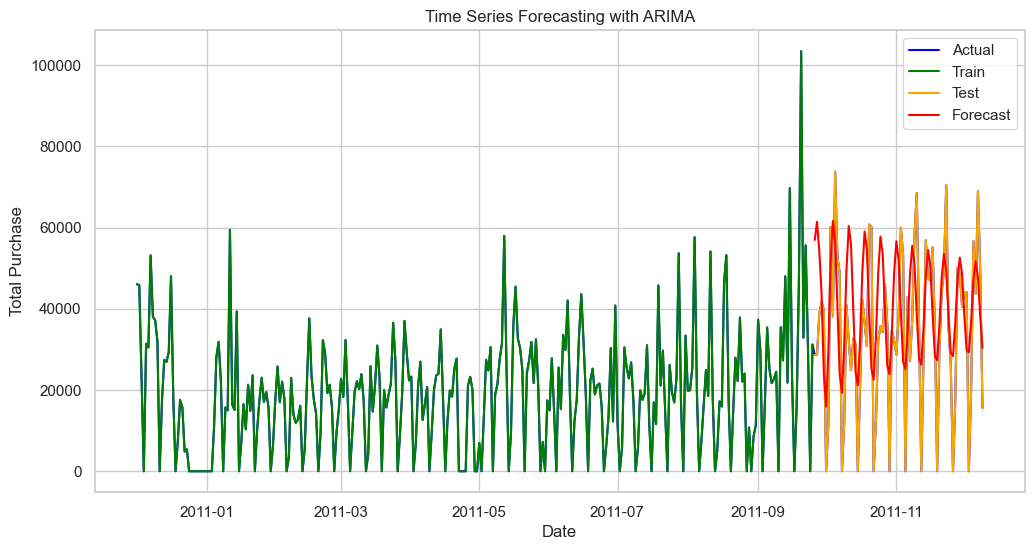

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Resample the data to daily and sum the total purchase for each day
total_purchase_daily = df.resample('D', on='InvoiceDate')['TotalPurchase'].sum()

# Train-test split
train_size = int(len(total_purchase_daily) * 0.8)
train, test = total_purchase_daily[:train_size], total_purchase_daily[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 2))  # Adjust order based on model evaluation
fit_model = model.fit()

# Forecast future values
forecast_steps = len(test)
forecast_index = pd.date_range(test.index[0], periods=forecast_steps, freq='D')
forecast = fit_model.get_forecast(steps=forecast_steps).predicted_mean
forecast.index = forecast_index

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(total_purchase_daily.index, total_purchase_daily, label='Actual', color='blue')
plt.plot(train.index, train, label='Train', color='green')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(forecast.index, forecast, label='Forecast', color='red')

plt.title('Time Series Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Total Purchase')
plt.legend()
plt.show()


C:\Users\aswat\AppData\Local\Temp\ipykernel_16800\2026339409.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will 

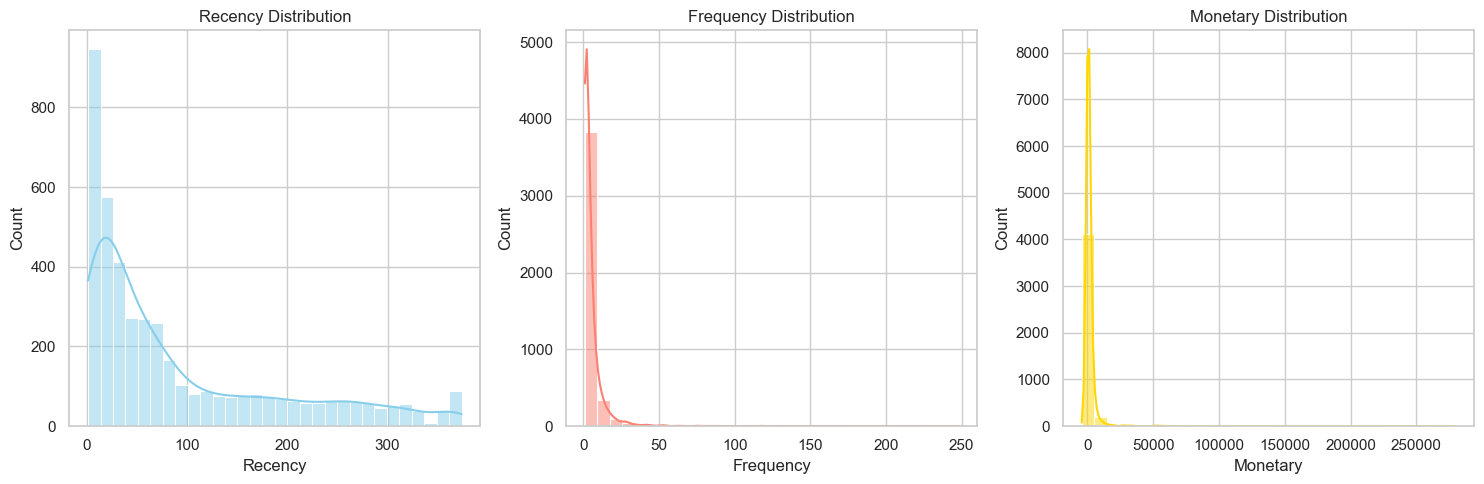

In [ ]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'InvoiceDate' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Calculate Recency, Frequency, and Monetary values for each customer
current_date = df['InvoiceDate'].max() + pd.DateOffset(1)
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPurchase': 'sum'
}).reset_index()

# Rename columns for clarity
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Visualize the distribution of Recency, Frequency, and Monetary values
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], bins=30, color='skyblue', kde=True)
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], bins=30, color='salmon', kde=True)
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], bins=30, color='gold', kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the w

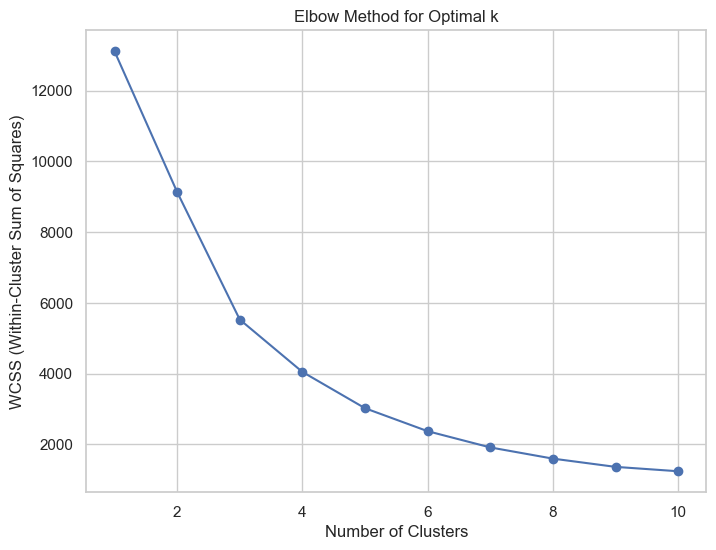

In [ ]:
# Perform k-means clustering for segmentation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\aswat\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



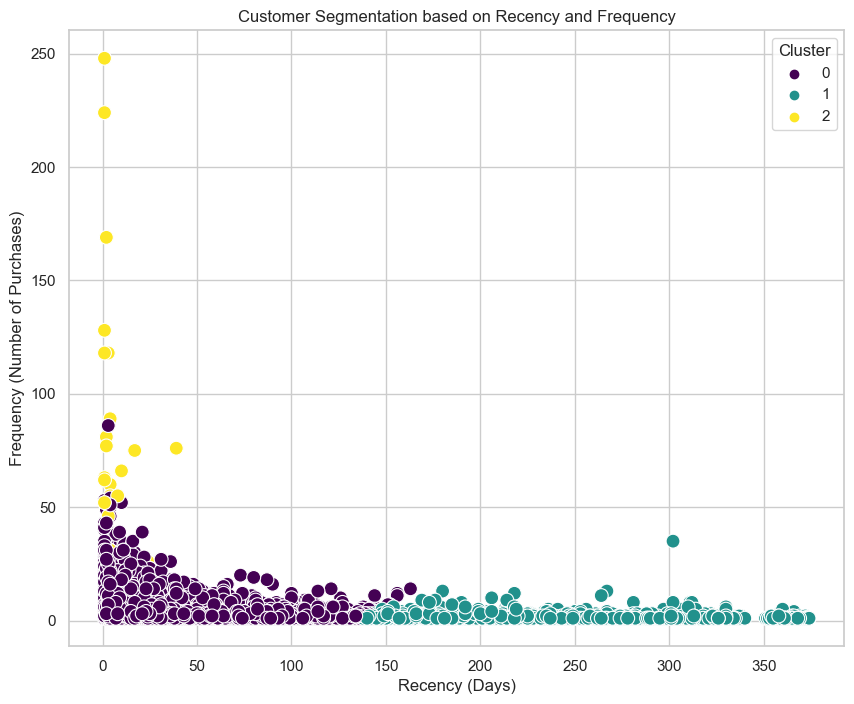

In [ ]:
# Plot clusters based on Recency and Frequency, label points with Monetary value
plt.figure(figsize=(10, 8))

sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm_df, palette='viridis', s=100)
plt.title('Customer Segmentation based on Recency and Frequency')
plt.xlabel('Recency (Days)')
plt.ylabel('Frequency (Number of Purchases)')

# Label points with Monetary value
#for i, txt in enumerate(rfm_df['Monetary']):
    #plt.annotate(txt, (rfm_df['Recency'].iloc[i], rfm_df['Frequency'].iloc[i]), fontsize=8, ha='right')

plt.show()
